In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [119]:
def function(x):
    return(np.cos(x))

In [120]:
xmin = 0
xmax = 1.75
n = 100000

X=np.linspace(xmin,xmax,n)

In [121]:
def boundaryFinder(func):
    y=func
    ymin=y[0]
    ymax=[-1]
    for i in range(len(y)):
        if(ymin>y[i]):
            ymin=y[i]
        elif(ymax<y[i]):
            ymax=y[i]
    return ymin,ymax

In [122]:
def integrate(xmin,xmax,n):
    yMin,yMax=boundaryFinder(function(X))
    area=(xmax-xmin)*(yMax-yMin)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(xmin,xmax,1)
        xs.append(x)
        y=np.random.uniform(yMin,yMax,1)
        ys.append(y)
        if abs(y)>abs(function(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    print("x boundaries" , xmin,xmax, "y boundaries" , yMin,yMax)
    return(np.mean(check)*area,xs,ys,check)

In [123]:
print(integrate(xmin,xmax,n)[0])

x boundaries 0 1.75 y boundaries -0.17824605564949209 1.0
1.0148410014217422


In [128]:
answer = np.sin(1.75) - np.sin(0)
print(answer)
error_monte = integrate(xmin,xmax,tol)[0] - answer
print("error =" ,error_monte)

0.9839859468739369
x boundaries 0 1.75 y boundaries -0.17824605564949209 1.0
error = 0.032112832212211284


In [125]:
yMin,yMax=boundaryFinder(function(X))
x=np.random.uniform(xmin,xmax,10000)
y=np.random.uniform(yMin,yMax,10000)

In [126]:
ir = np.where((y)<function(x))[0]
ur = np.where((y)>=function(x))[0]

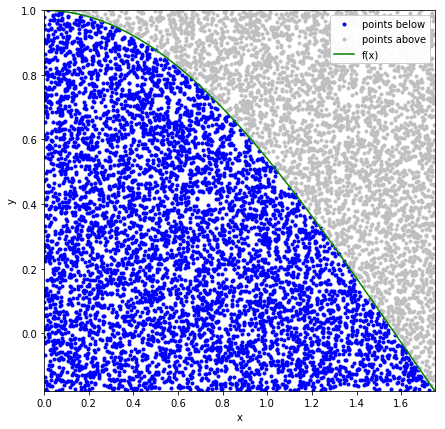

In [127]:
fig = plt.figure(figsize=(7,7))
plt.xlim([xmin,xmax])
plt.ylim([yMin,yMax])
plt.plot(x[ir],y[ir],'.',color='blue',label = "points below")
plt.plot(x[ur],y[ur],'.',color="0.75", label = "points above")
theta=np.linspace(0,2*np.pi,1000)
xc = X
yc = function(xc)
plt.plot(xc,yc,color='green',label = "f(x)")

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1,framealpha=0.95)
plt.show()